### Importing required libraries ###

In [148]:
import cv2
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity
from numpy import dot
from numpy.linalg import norm
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

### Display and comparison of two images using the similarity algorithms ###

In [149]:
def img_compare(fname1,fname2): 
    
    # open images #

    f1 = Image.open(fname1)
    f2 = Image.open(fname2)
    
    
    # using .resize to scale image 2 to match image 1 dimensions #

    f1_reshape = f1.resize((round(f1.size[0]), round(f1.size[1])))
    f2_reshape = f2.resize((round(f1.size[0]), round(f1.size[1])))
    
    # display resized images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(f1_reshape)
    ax[1].imshow(f2_reshape)

    # convert the images to (R,G,B) arrays #

    f1_array = np.array(f1_reshape)
    f2_array = np.array(f2_reshape)

    # flatten the arrays to one dimensional vectors

    f1_array = f1_array.flatten()
    f2_array = f2_array.flatten()

    # divide the arrays by 255, the maximum RGB value to make sure every value is on a 0-1 scale #

    a = f1_array/255
    b = f2_array/255
    
    cos_similarity = dot(a, b)/(norm(a)*norm(b))
    ssim = structural_similarity(a,b,data_range=1)
    
    print('Cosine similarity:' + str(round(cos_similarity,3)))
    print('structural similarity index measure:' + str(round(ssim,3)))

Cosine similarity:0.825
structural similarity index measure:0.608


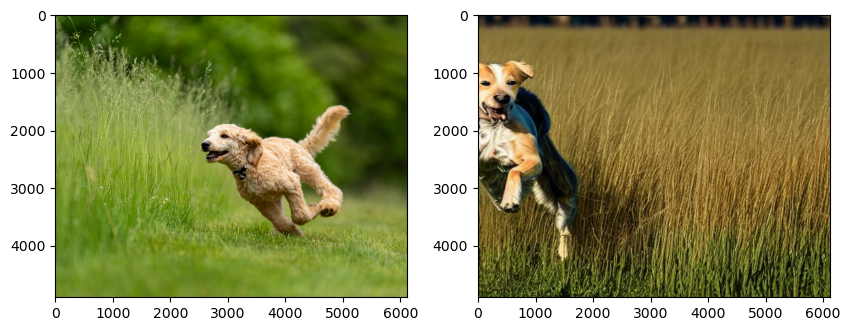

In [150]:
# example of similarity #
img_compare('browndog.jpg','gitlarge_stable_diff.jpg')

## Comparison using different encoder (input) but same decoder (output) ##

#### GIT-base encoder and stable diffusion decoder ####

Cosine similarity:0.801
structural similarity index measure:0.578


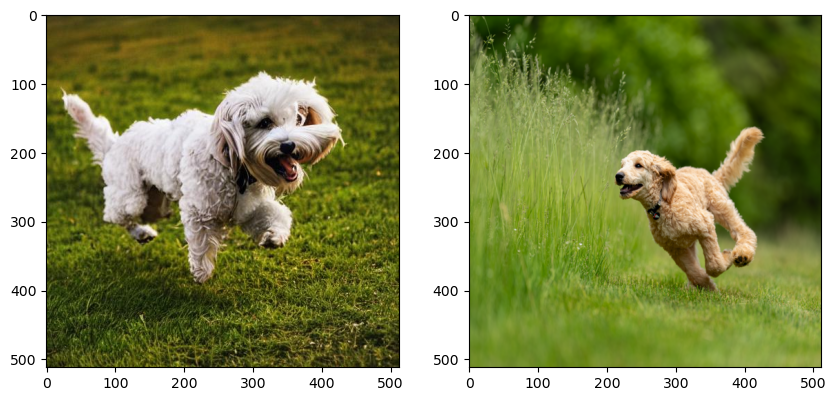

In [151]:
img_compare('gitbase_stable_diff.jpg','browndog.jpg')

#### GIT-large encoder and stable diffusion decoder ####

Cosine similarity:0.824
structural similarity index measure:0.564


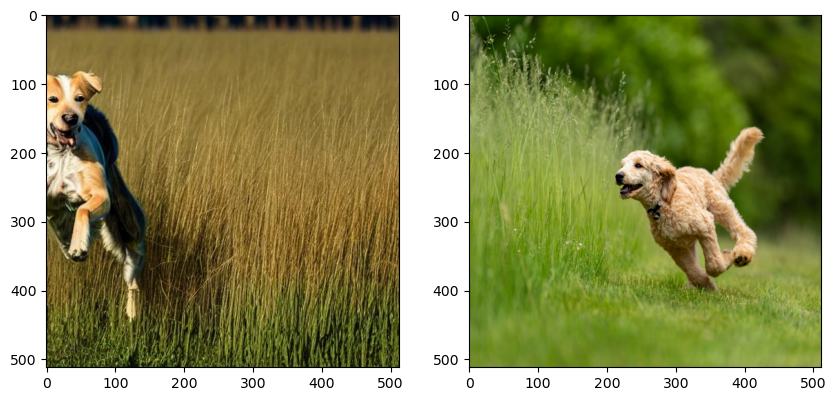

In [152]:
img_compare('gitlarge_stable_diff.jpg','browndog.jpg')

#### BLIP-base encoder and stable diffusion decoder ####

Cosine similarity:0.723
structural similarity index measure:0.466


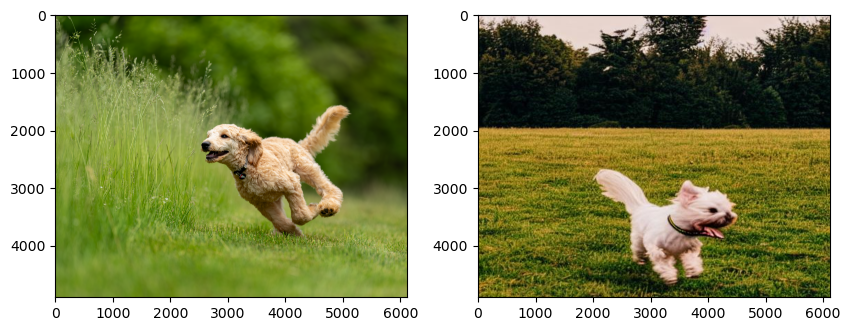

In [153]:
img_compare('browndog.jpg','blipbase_stable_diff.jpg')

#### BLIP-large encoder and stable diffusion decoder ####

Cosine similarity:0.836
structural similarity index measure:0.625


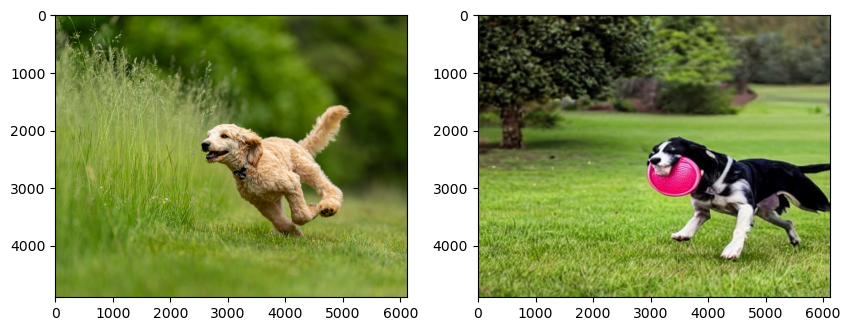

In [154]:
img_compare('browndog.jpg','bliplarge_stable_diff.jpg')

#### ViT+GPT-2 encoder and stable diffusion decoder ####

Cosine similarity:0.867
structural similarity index measure:0.734


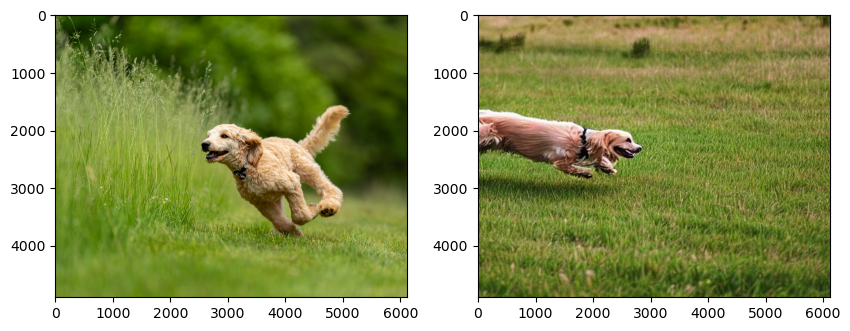

In [155]:
img_compare('browndog.jpg','vitgpt2_stable_diff.jpg')

### Plotting performences of two similarity metrices by five encoder models ###

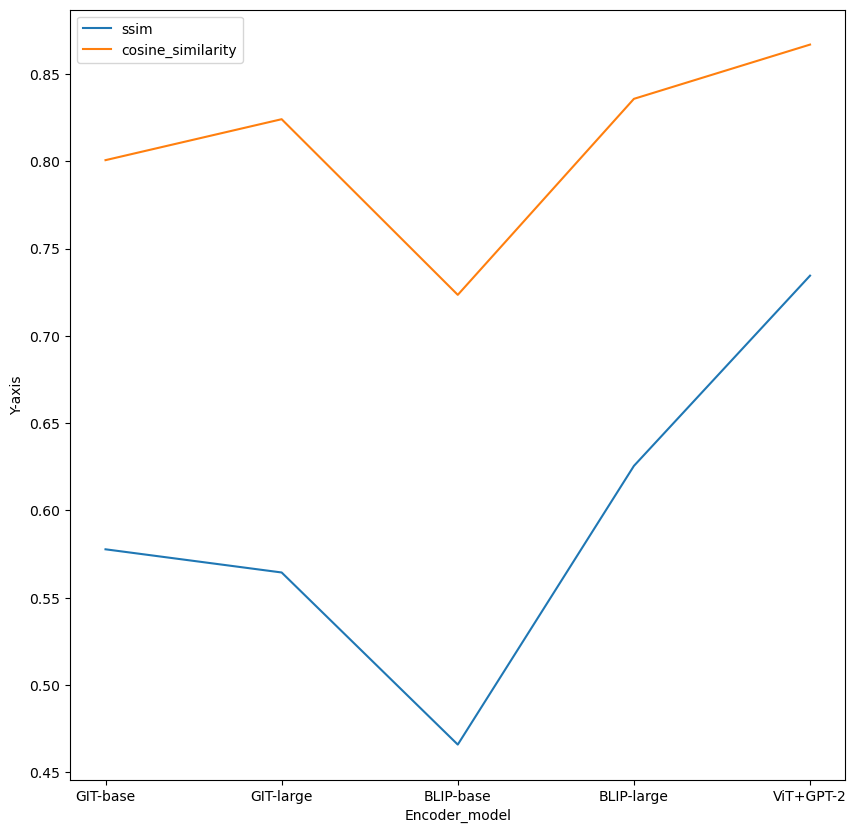

In [194]:
cosine_similarity = [0.800615241565599,0.824071129785272,0.723466372397781,0.835734604032179,0.866809837251967]
ssim = [0.577732198537648,0.564453940299473,0.465884407542704,0.625499957632813,0.734460836885503]
x = ['GIT-base','GIT-large','BLIP-base','BLIP-large','ViT+GPT-2']

plt.plot(x, ssims, label='ssim')
plt.plot(x, cosine_similaritys, label='cosine_similarity')

plt.xlabel('Encoder_model')
plt.ylabel('Y-axis')
plt.legend()